In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import csv

In [4]:
data = pd.read_csv('train.csv')

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#drop the null value
data.dropna(how='any',inplace=True,axis=0)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [30]:
data.Married=LabelEncoder().fit_transform(data.Married)
data.Gender=LabelEncoder().fit_transform(data.Gender)
data.Education=LabelEncoder().fit_transform(data.Education)
data.Self_Employed=LabelEncoder().fit_transform(data.Self_Employed)
data.Property_Area=LabelEncoder().fit_transform(data.Property_Area)
data.Loan_Status=LabelEncoder().fit_transform(data.Loan_Status)
data=data.drop(['Loan_ID'],axis=1)

In [12]:
data['Gender'].unique()

array([1, 0])

In [26]:
data['Credit_History'].unique()

array([1., 0.])

In [32]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [36]:
data=data.replace(to_replace ="3+",value =3)
data=data.astype(int)

In [44]:
train,test=train_test_split(data,test_size=0.2,random_state=0)

In [46]:
train_x=train.drop(columns=['Loan_Status'])
train_y=train['Loan_Status']
test_x=test.drop(columns=['Loan_Status'])
test_y=test['Loan_Status']

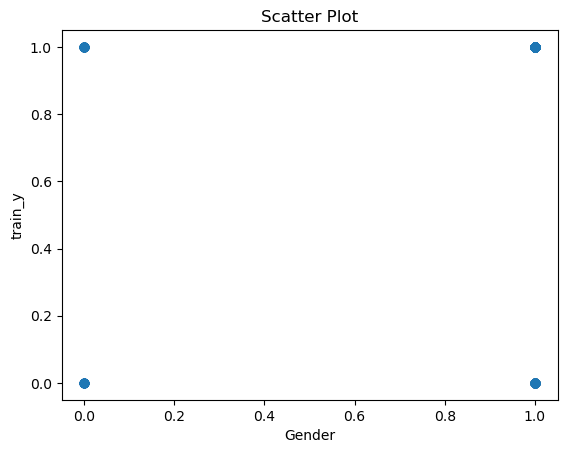

In [48]:
import matplotlib.pyplot as plt
plt.scatter(train_x['Gender'], train_y)
plt.title("Scatter Plot")
plt.xlabel("Gender")
plt.ylabel("train_y")
plt.show()

In [50]:
train_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
481,1,1,3,1,0,3095,0,113,360,1,0
341,0,0,0,0,0,2378,0,46,360,1,0
297,0,1,1,0,0,4666,0,135,360,1,2
255,0,0,3,0,0,3083,0,255,360,1,0
271,1,1,0,0,0,11146,0,136,360,1,2


In [56]:
size=len(train)

In [58]:
print(size)

384


In [60]:
#create the object of the model
model=LogisticRegression()

In [62]:
model.fit(train_x,train_y)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
predict=model.predict(test_x)

In [66]:
print(accuracy_score(test_y,predict))

0.7604166666666666


In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [72]:
mae = mean_absolute_error(test_y,predict)
print(mae)
mse = mean_squared_error(test_y,predict)
print(mse)
rmse = mean_squared_error(test_y,predict,squared=False)
print(rmse)

0.23958333333333334
0.23958333333333334
0.48947250518628044


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
